# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [1]:
import nltk
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd

In [2]:
data = pd.read_csv('./data/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [3]:
#Number of reviews in total
print("Number of reviews: {}".format(data.shape[0]))

Number of reviews: 913


In [4]:
print("% distribution of reviews \n",
         data.stars.value_counts() * (100 / len(data)))

% distribution of reviews 
 5    68.346112
4    23.767798
3     6.133625
2     1.314348
1     0.438116
Name: stars, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#apply lets map each row to their character lengths
#kde is set to false so that absolute numbers show on the y-axis
#max_len = max([len(x) for x in data.reviews])

sns.distplot(data.reviews.apply(len), kde=False, color="g")
plt.xlabel('Character length of reviews')
plt.ylabel('Number of reviews')
plt.suptitle('Distribution of Character Length')
#plt.xlim(xmax=max_len)

Text(0.5, 0.98, 'Distribution of Character Length')

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

In [6]:
data.reviews[1]

'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and conta

In [7]:
#Remove all words that contain numbers
data.reviews = data.reviews.replace('\w*\d\w*', '', regex=True)

In [8]:
#Make al ltext lowercase
data.reviews = data.reviews.str.lower()

In [9]:
import re
import string

#map each row to a function that removes punctuation
data.reviews = data.reviews.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [10]:
from nltk.tokenize import word_tokenize

#map each row to the tokenize function
data.reviews = data.reviews.apply(lambda x: word_tokenize(x))

In [11]:
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they..."
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that..."
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased..."


[('i', 2145), ('and', 1755), ('the', 1652), ('a', 1310), ('it', 1028), ('to', 991), ('my', 845), ('cookies', 843), ('cookie', 842), ('of', 780)]


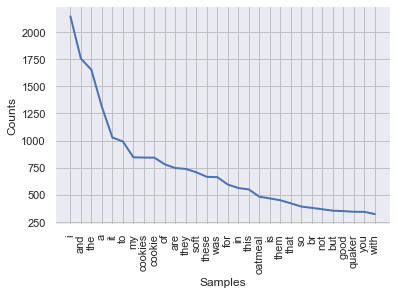

In [12]:
x = []
for token in data.reviews:
    x += token

from nltk.probability import FreqDist
freq_distribution = FreqDist(x)

print(freq_distribution.most_common(10))
freq_distribution.plot(30, cumulative=False)

Text(0, 0.5, 'Number of words')

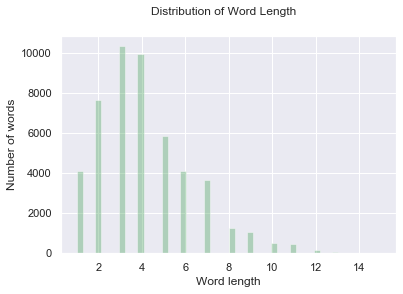

In [13]:
#word length of dictionary
#x is a concatenation of all the tokenized reviews so it can simply be mapped to the function len

sns.distplot(list(map(len, x)), kde=False, color="g")
plt.suptitle("Distribution of Word Length")
plt.xlabel("Word length")
plt.ylabel("Number of words")


## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [23]:
data.head()

,user_id,stars,reviews,reviews_wo_sw,reviews_pos,reviews_stem
0,A368Z46FIKHSEZ,5,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[i, lov, thes, cooky, not, on, ar, they, healt..."
1,A1JAPP1CXRG57A,5,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[quak, soft, bak, oatm, cooky, with, raisin, a..."
2,A2Z9JNXPIEL2B9,5,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[i, am, us, not, a, hug, fan, of, oatm, cooky,..."
3,A31CYJQO3FL586,5,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N...","[i, particip, in, a, produc, review, that, inc..."
4,A2KXQ2EKFF3K2G,5,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[my, kid, lov, thes, i, was, very, pleas, to, ..."


In [15]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

#map lists in each row to a new list where stop_words have been removed using list comprehension
data['reviews_wo_sw'] = data.reviews.apply(lambda x: [word for word in x if word not in stop_words])

In [19]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
data['reviews_pos'] = data.reviews_wo_sw.apply(lambda x: pos_tag(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NiniolaAdegboyega\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [22]:
from nltk.stem.lancaster import LancasterStemmer

stemmer = LancasterStemmer()

data['reviews_stem'] = data.reviews.apply(lambda x: [stemmer.stem(word) for word in x])

## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?

[('cookies', 843), ('cookie', 842), ('soft', 707), ('oatmeal', 482), ('br', 379), ('good', 349), ('quaker', 343), ('like', 297), ('taste', 294), ('love', 291)]


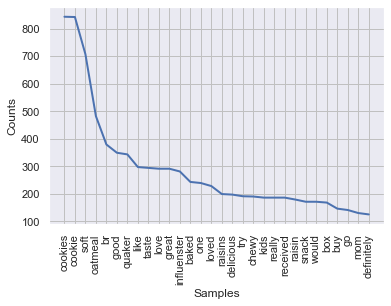

In [25]:
y = []
for token in data.reviews_wo_sw:
    y += token

freq_distribution = FreqDist(y)

print(freq_distribution.most_common(10))
freq_distribution.plot(30, cumulative=False)

### Comments

The most common words do make more sense now. 
* There are more nouns specific to the context of the data - soft, quaker, oatmeal, cookies, raisins, chewy, snack, mom. 
* It's much easier to see how we can use these reviews to help the restaurant/scack shop create the cookies people want and drive sales. 
* When I saw 'mom' is a common word, I thought it was interesting. Moms may be a deciding factor in purchase of cookies and it may make sense to target them with advertising if we are looking to drive sales. 